# <u> POS tagging using Modified Viterbi Algorithm ::: </u>

### Syntactic Processing 

## Problem Statement :::

In this assignment, we need to modify the Viterbi algorithm to solve the problem of unknown words using at least two techniques. Though there could be multiple ways to solve this problem, you may use the following hints:

Which tag class do you think most unknown words belong to? Can you identify rules (e.g. based on morphological cues) that can be used to tag unknown words? You may define separate python functions to exploit these rules so that they work in tandem with the original Viterbi algorithm.

Why does the Viterbi algorithm choose a random tag on encountering an unknown word? Can you modify the Viterbi algorithm so that it considers only one of the transition or emission probabilities for unknown words?
 

You have been given a 'test' file below containing some sample sentences with unknown words. Look at the sentences and try to observe rules which may be useful to tag unknown words. Your final model will be evaluated on a similar test file.

## Data :::
For this assignment, you’ll use the Treebank dataset of NLTK with the 'universal' tagset. The Universal tagset of NLTK comprises only 12 coarse tag classes as follows: Verb, Noun, Pronouns, Adjectives, Adverbs, Adpositions, Conjunctions, Determiners, Cardinal Numbers, Particles, Other/ Foreign words, Punctuations.

 

Note that using only 12 coarse classes (compared to the 46 fine classes such as NNP, VBD etc.) will make the Viterbi algorithm faster as well.

 

## Goals :::
You can split the Treebank dataset into train and validation sets. Please use a sample size of 95:5 for training: validation sets, i.e. keep the validation size small, else the algorithm will need a very high amount of runtime.

 

You need to accomplish the following in this assignment:

Write the vanilla Viterbi algorithm for assigning POS tags (i.e. without dealing with unknown words) 
Solve the problem of unknown words using at least two techniques. These techniques can use any of the approaches discussed in the class - lexicon, rule-based, probabilistic etc. Note that to implement these techniques, you can either write separate functions and call them from the main Viterbi algorithm, or modify the Viterbi algorithm, or both.
Compare the tagging accuracy after making these modifications with the vanilla Viterbi algorithm.
List down at least three cases from the sample test file (i.e. unknown word-tag pairs) which were incorrectly tagged by the original Viterbi POS tagger and got corrected after your modifications.



### Data Preparation

In [155]:
#Importing all the required libraries

import nltk
import random
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
from nltk.tokenize import word_tokenize

The below command was run in order to import the universal tagset as it wasn't present in my current setup before. It can be ignored if it is already present.

In [156]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [157]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [158]:
type(nltk_data)

list

In [159]:
nltk_data[:3]

[[('Pierre', 'NOUN'),
  ('Vinken', 'NOUN'),
  (',', '.'),
  ('61', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  (',', '.'),
  ('will', 'VERB'),
  ('join', 'VERB'),
  ('the', 'DET'),
  ('board', 'NOUN'),
  ('as', 'ADP'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
  ('director', 'NOUN'),
  ('Nov.', 'NOUN'),
  ('29', 'NUM'),
  ('.', '.')],
 [('Mr.', 'NOUN'),
  ('Vinken', 'NOUN'),
  ('is', 'VERB'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Elsevier', 'NOUN'),
  ('N.V.', 'NOUN'),
  (',', '.'),
  ('the', 'DET'),
  ('Dutch', 'NOUN'),
  ('publishing', 'VERB'),
  ('group', 'NOUN'),
  ('.', '.')],
 [('Rudolph', 'NOUN'),
  ('Agnew', 'NOUN'),
  (',', '.'),
  ('55', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  ('and', 'CONJ'),
  ('former', 'ADJ'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Consolidated', 'NOUN'),
  ('Gold', 'NOUN'),
  ('Fields', 'NOUN'),
  ('PLC', 'NOUN'),
  (',', '.'),
  ('was', 'VERB'),
  ('named', 'VERB'),
  ('*-1', 'X'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
 

In [160]:
# split data into training and validation set in the ratio 95:5

random.seed(1234)
train_set, test_set = train_test_split(nltk_data, train_size=0.95, test_size=0.05)

print("Length of Training Set -", len(train_set))
print("Length of Testing Set -", len(test_set))
print("\n")

print(train_set[:10])

Length of Training Set - 3718
Length of Testing Set - 196


[[('The', 'DET'), ('language', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('appropriations', 'NOUN'), ('rider', 'NOUN'), ('implies', 'VERB'), ('that', 'ADP'), ('any', 'DET'), ('nomination', 'NOUN'), ('to', 'PRT'), ('any', 'DET'), ('position', 'NOUN'), ('of', 'ADP'), ('a', 'DET'), ('rejected', 'VERB'), ('nominee', 'NOUN'), ('will', 'VERB'), ('result', 'VERB'), ('in', 'ADP'), ('the', 'DET'), ('president', 'NOUN'), ('being', 'VERB'), ('denied', 'VERB'), ('*-55', 'X'), ('funding', 'VERB'), ('0', 'X'), ('*', 'X'), ('to', 'PRT'), ('pay', 'VERB'), ('that', 'DET'), ('person', 'NOUN'), ("'s", 'PRT'), ('salary', 'NOUN'), ('*T*-1', 'X'), ('.', '.')], [('Proper', 'ADJ'), ('English', 'ADJ'), ('bells', 'NOUN'), ('are', 'VERB'), ('started', 'VERB'), ('*-1', 'X'), ('off', 'PRT'), ('in', 'ADP'), ('``', '.'), ('rounds', 'NOUN'), (',', '.'), ("''", '.'), ('from', 'ADP'), ('the', 'DET'), ('highest-pitched', 'ADJ'), ('bell', 'NOUN'), ('to', 'PRT'), (

In [161]:
# Getting list of tagged words in training set
train_tagged_words = [tup for sent in train_set for tup in sent]
print("Length of Train Tagged Words - ", len(train_tagged_words))

# Getting list of tagged words in testing set
test_tagged_words = [tup[0] for sent in test_set for tup in sent]
print("Length of Test Tagged Words - ", len(test_tagged_words))

Length of Train Tagged Words -  95581
Length of Test Tagged Words -  5095


In [162]:
# first 10 tokens/words in the training set

train_set_tokens = [pair[0] for pair in train_tagged_words]
train_set_tokens[:10]

['The',
 'language',
 'of',
 'the',
 'appropriations',
 'rider',
 'implies',
 'that',
 'any',
 'nomination']

In [163]:
# Convert train vocabulary to a set
train_vocab_set = set(train_set_tokens)

In [164]:
# POS tags for the tokens in the train set 
train_pos_tokens = [tag[1] for tag in train_tagged_words]
train_pos_tokens[:10]

['DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'NOUN', 'VERB', 'ADP', 'DET', 'NOUN']

In [165]:
# store the unique POS tags to a set
train_pos_set = set(train_pos_tokens)

In [166]:
# let's check how many words are present in vocabulary
print(len(train_vocab_set))

12081


In [167]:
# let's check how many unique tags are present in training data
print(len(train_pos_set))

12


In [168]:
len_pos_set = len(train_pos_set)
len_vocab_set = len(train_vocab_set)

### Build the Plain Vanilla Viterbi based POS tagger

In [169]:
# compute emission probability for a given word for a given tag
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1] == tag]
    tag_count = len(tag_list)    
    word_given_tag_list = [pair[0] for pair in tag_list if pair[0] == word]    
    word_given_tag_count = len(word_given_tag_list)    
    
    return (word_given_tag_count, tag_count)

In [170]:
# compute transition probabilities of a previous and next tag
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    
    t1_tags_list = [tag for tag in tags if tag == t1]
    t1_tags_count = len(t1_tags_list)
    
    t2_given_t1_list = [tags[index+1] for index in range(len(tags)-1) if tags[index] == t1 and tags[index+1] == t2]
    t2_given_t1_count = len(t2_given_t1_list)
    
    return(t2_given_t1_count, t1_tags_count)

In [171]:
# creating t x t transition matrix of training_pos_tag_set
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len_pos_set, len_pos_set), dtype='float32')
for i, t1 in enumerate(list(train_pos_set)):
    for j, t2 in enumerate(list(train_pos_set)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [172]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(train_pos_set), index=list(train_pos_set))

In [173]:
# Let's have a glimpse into the transition matrix
tags_df

,CONJ,ADP,NOUN,PRT,DET,X,ADV,NUM,.,VERB,PRON,ADJ
CONJ,0.000463,0.053704,0.351389,0.004630,0.117593,0.008333,0.056019,0.043056,0.034722,0.155556,0.057407,0.117130
ADP,0.000856,0.017450,0.321486,0.001285,0.324591,0.034258,0.013596,0.064126,0.039396,0.008350,0.068515,0.106091
NOUN,0.042812,0.176174,0.264645,0.043140,0.013614,0.028870,0.017190,0.009416,0.240045,0.147122,0.004599,0.012373
PRT,0.002310,0.020462,0.246535,0.001650,0.101650,0.013531,0.009571,0.057756,0.040924,0.402640,0.018152,0.084818
DET,0.000483,0.009418,0.637044,0.000241,0.005192,0.046124,0.012437,0.022096,0.017991,0.039845,0.003381,0.205747
X,0.010625,0.144148,0.061687,0.184110,0.055186,0.074691,0.026007,0.002854,0.163495,0.204408,0.055820,0.016968
ADV,0.007307,0.118233,0.032215,0.013949,0.067419,0.023580,0.079044,0.032215,0.131850,0.349053,0.015942,0.129193
NUM,0.014243,0.035905,0.353116,0.027300,0.003264,0.208012,0.002671,0.183086,0.118991,0.017804,0.001484,0.034125
.,0.058151,0.091367,0.222252,0.002430,0.173373,0.027725,0.052660,0.079755,0.093528,0.088487,0.065802,0.044378
VERB,0.005353,0.090373,0.109922,0.030952,0.133892,0.219611,0.081375,0.022962,0.034986,0.168800,0.035839,0.065937


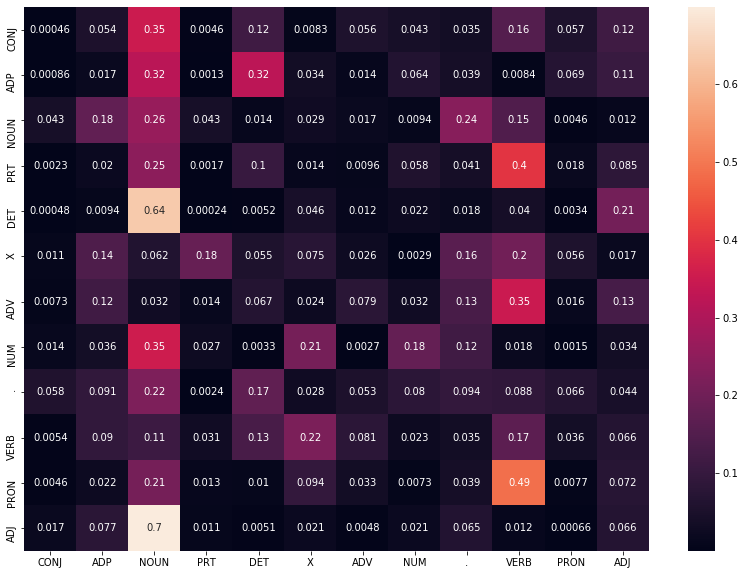

In [174]:
# plotting heatmap of tags matrix

plt.figure(figsize=(14, 10))
sns.heatmap(tags_df, annot = True)
plt.show()

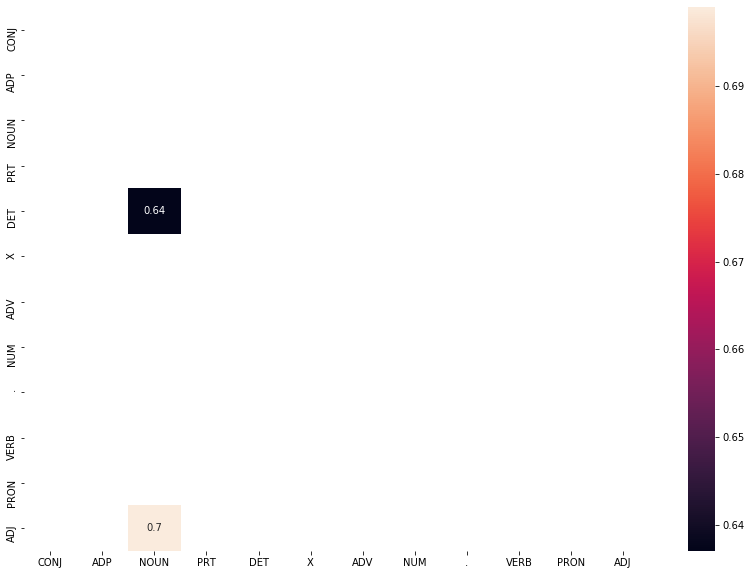

In [175]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5

tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(14, 10))
sns.heatmap(tags_frequent, annot=True)
plt.show()

In [176]:
# Plain Vanilla Viterbi Heuristic Algorithm implementation

def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [177]:
# Running on entire test dataset would take more than 3-4hrs. 
# Let's test our Viterbi algorithm on a few sample sentences of test dataset

random.seed(1234)

# choose random 5 sents
rndom = [random.randint(1,len(test_set)) for x in range(5)]

# list of sents
test_run = [test_set[i] for i in rndom]

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run

[[('A', 'DET'),
  ('seat', 'NOUN'),
  ('on', 'ADP'),
  ('the', 'DET'),
  ('Chicago', 'NOUN'),
  ('Board', 'NOUN'),
  ('of', 'ADP'),
  ('Trade', 'NOUN'),
  ('was', 'VERB'),
  ('sold', 'VERB'),
  ('*-1', 'X'),
  ('for', 'ADP'),
  ('$', '.'),
  ('350,000', 'NUM'),
  ('*U*', 'X'),
  (',', '.'),
  ('down', 'ADV'),
  ('$', '.'),
  ('16,000', 'NUM'),
  ('*U*', 'X'),
  ('from', 'ADP'),
  ('the', 'DET'),
  ('previous', 'ADJ'),
  ('sale', 'NOUN'),
  ('last', 'ADJ'),
  ('Friday', 'NOUN'),
  ('.', '.')],
 [('``', '.'),
  ('So', 'ADP'),
  ('the', 'DET'),
  ('focus', 'NOUN'),
  ('turned', 'VERB'),
  ('to', 'PRT'),
  ('other', 'ADJ'),
  ('fixed-income', 'ADJ'),
  ('markets', 'NOUN'),
  (',', '.'),
  ('corporate', 'ADJ'),
  ('and', 'CONJ'),
  ('mortgages', 'NOUN'),
  ('in', 'ADP'),
  ('particular', 'ADJ'),
  (',', '.'),
  ("''", '.'),
  ('she', 'PRON'),
  ('said', 'VERB'),
  ('*T*-1', 'X'),
  ('.', '.')],
 [('Mr.', 'NOUN'),
  ('Allen', 'NOUN'),
  ("'s", 'PRT'),
  ('Pittsburgh', 'NOUN'),
  ('firm', 'NO

In [178]:
# tagging the test sentences

start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)
#print(tagged_seq)

# accuracy

plain_vanilla_viterbi_word_check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
plain_vanilla_viterbi_accuracy = len(plain_vanilla_viterbi_word_check)/len(tagged_seq) * 100
print('Plain Vanilla Viterbi Heuristics Accuracy: ', plain_vanilla_viterbi_accuracy)

Time taken in seconds:  73.59613966941833
Plain Vanilla Viterbi Heuristics Accuracy:  92.1875


In [179]:
# Let'c check the incorrect tagged words

incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]

incorrect_tagged_cases

[[('``', '.'), (('So', 'ADV'), ('So', 'ADP'))],
 [('other', 'ADJ'), (('fixed-income', 'CONJ'), ('fixed-income', 'ADJ'))],
 [(',', '.'), (('executes', 'CONJ'), ('executes', 'VERB'))],
 [('$', '.'), (('1.82', 'CONJ'), ('1.82', 'NUM'))],
 [('$', '.'), (('84.29', 'CONJ'), ('84.29', 'NUM'))],
 [('.', '.'), (('Items', 'CONJ'), ('Items', 'NOUN'))],
 [('supply', 'NOUN'), (('numbered', 'CONJ'), ('numbered', 'VERB'))],
 [('only', 'ADV'), (('about', 'ADP'), ('about', 'ADV'))],
 [('one', 'NUM'), (('newcomer', 'CONJ'), ('newcomer', 'NOUN'))],
 [('milk', 'NOUN'), (('powder', 'CONJ'), ('powder', 'NOUN'))]]

### Solve the problem of unknown words

In [180]:
# Let's try with some Lexicon and Rule-Based Models for POS Tagging

#### Unigram Tagger

#### Evaluating tagging accuracy

In [181]:
# Lexicon or unigram tagger

unigram_tagger = nltk.UnigramTagger(train_set)
unigram_tagger_accuracy = unigram_tagger.evaluate(test_set)
print("Unigram accuracy -", unigram_tagger_accuracy)

Unigram accuracy - 0.9030421982335624


In [182]:
# patterns for tagging using a rule based regex tagger -

patterns = [
    (r'^[aA-zZ].*[0-9]+','NOUN'),  # this is alpha numeric
    (r'.*ness$', 'NOUN'),
    (r'.*\'s$', 'NOUN'),              # these are possessive nouns
    (r'.*s$', 'NOUN'),                # these are plural nouns
    (r'^(wh|Wh).*$', 'CONJ'),
    (r'.*', 'NOUN'),    
    (r'.*ly$', 'ADV'),
    (r'^(0|([*|-|$].*))','X'), # these are any special character combination
    (r'.*ould$', 'X'), # these are modals
    (r'(The|the|A|a|An|an)$', 'DET'),
    (r'^([0-9]|[aA-zZ])+\-[aA-zZ]*$','ADJ'),
    (r'.*able$', 'ADJ'), # these are adjectives like 100-megabytes 237-Seats
    (r'[aA-zZ]+(ed|ing|es)$', 'VERB'), # these are any word ending with 'ing' or 'ed' is a verb
    (r'[0-9].?[,\/]?[0-9]*','NUM') # these are numbers 
    ]

#### Evaluating tagging accuracy

In [183]:
# rule based tagger

rule_based_tagger = nltk.RegexpTagger(patterns)

# unigram tagger backed up by the rule-based tagger
rule_based_unigram_tagger = nltk.UnigramTagger(train_set, backoff = rule_based_tagger)

rule_based_unigram_tagger_accuracy = rule_based_unigram_tagger.evaluate(test_set)

print("The accuracy of the Unigram Tagger backed up by the RegexpTagger is -", rule_based_unigram_tagger_accuracy)

The accuracy of the Unigram Tagger backed up by the RegexpTagger is - 0.9383709519136408


#### Evaluating tagging accuracy

In [184]:
# Bigram tagger

bigram_tagger = nltk.BigramTagger(train_set, backoff=rule_based_unigram_tagger)
bigram_tagger.evaluate(test_set)
bigram_tagger_accuracy = bigram_tagger.evaluate(test_set)
print(bigram_tagger_accuracy)


0.9407262021589794


#### Evaluating tagging accuracy

In [185]:
# Trigram tagger

trigram_tagger = nltk.TrigramTagger(train_set, backoff = bigram_tagger)
trigram_tagger.evaluate(test_set)
trigram_tagger_accuracy = trigram_tagger.evaluate(test_set)
print("The accuracy of the Trigram Tagger backed up by the bigram_tagger is -", trigram_tagger_accuracy)

The accuracy of the Trigram Tagger backed up by the bigram_tagger is - 0.9417075564278704


### Viterbi Modification Technique - I

In [186]:
# use transition probability of tags when emission probability is zero (in case of unknown words)

def Modified_Viterbi_for_Unknown_Words(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        p_transition =[] # list for storing transition probabilities
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            p_transition.append(transition_p)
            
        pmax = max(p)
        state_max = T[p.index(pmax)] 
      
        # if probability is zero (unknown word) then use transition probability
        if(pmax==0):
            pmax = max(p_transition)
            state_max = T[p_transition.index(pmax)]
                           
        else:
            state_max = T[p.index(pmax)] 
        
        state.append(state_max)
    return list(zip(words, state))

#### Evaluating tagging accuracy

In [187]:
# tagging the test sentences

start = time.time()
tagged_seq = Modified_Viterbi_for_Unknown_Words(test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)

# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
Modified_Viterbi_accuracy = len(check)/len(tagged_seq)
print('Modified Viterbi for Unknown Words Accuracy: ',Modified_Viterbi_accuracy*100)

Time taken in seconds:  68.45131063461304
Modified Viterbi for Unknown Words Accuracy:  94.53125


### Viterbi Modification-Technique II

In [188]:
# A trigram tagger backed off by a rule based tagger.

def trigram_tagger(word, train_set = train_set):
    
    patterns = [
    (r'[aA-zZ]+(ed|ing|es)$', 'VERB'), # Any word ending with 'ing' or 'ed' is a verb

    (r'.*ly$', 'ADV'),
        
    (r'^([0-9]|[aA-zZ])+\-[aA-zZ]*$','ADJ'),
    (r'.*able$', 'ADJ'), 
    (r'.*ful$', 'ADJ'),
    (r'.*ous$', 'ADJ'),
        
    (r'^[aA-zZ].*[0-9]+','NOUN'),     # Alpha Numeric
    (r'.*ness$', 'NOUN'),
    (r'.*\'s$', 'NOUN'),              # possessive nouns - words ending with 's
    (r'.*s$', 'NOUN'),                # plural nouns
    (r'.*ers$', 'NOUN'),              # eg.- kinderganteners, autobioghapgers
    (r'.*ment$', 'NOUN'),
    (r'.*town$', 'NOUN'),
    (r'^(wh|Wh).*$', 'CONJ'),
        
    (r'^(0|([*|-|$].*))','X'), # Any special character combination
    (r'.*ould$', 'X'),
        
    (r'(The|the|A|a|An|an|That|that|This|this|Those|those|These|these)$', 'DET'), # That/this/these/those belong to the category of Demonstrative determiners
    (r'[0-9].?[,\/]?[0-9]*','NUM'), # Numbers 
        
    (r'.*', 'NOUN')
    ]

    regex_based_tagger = nltk.RegexpTagger(patterns)

    # trigram backed up by the regex tagger
    trigram_regex_tagger = nltk.TrigramTagger(train_set, backoff = regex_based_tagger)
    return trigram_regex_tagger.tag_sents([[(word)]])

In [189]:
# modified viterbi with handling for unknown words using combination of trigram and regex tagger

def Modified_Viterbi_Trigram_Tagger(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        # unknown words from trigram taggr
        if word not in train_vocab_set:
            unk_word_tag=trigram_tagger(word)
            for sent in unk_word_tag:
                for tup in sent:
                    state.append(tup[1])
        # rest remains same            
        else:            
            p = [] 
            for tag in T:
                if key == 0:
                    transition_p = tags_df.loc['.', tag]
                else:
                    transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
                emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
                state_probability = emission_p * transition_p    
                p.append(state_probability)
            
            pmax = max(p)
            # getting state for which probability is maximum
            state_max = T[p.index(pmax)] 
            state.append(state_max)
            
    return list(zip(words, state))

#### Evaluating tagging accuracy

In [190]:
# tagging the test sentences
start = time.time()
tagged_seq = Modified_Viterbi_Trigram_Tagger(test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)

# accuracy
Modified_viterbi_trigram_word_check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
Modified_viterbi_trigram_accuracy = len(Modified_viterbi_trigram_word_check)/len(tagged_seq) * 100
print('Modified Viterbi Trigram Tagger Accuracy: ', Modified_viterbi_trigram_accuracy)

Time taken in seconds:  125.32479453086853
Modified Viterbi Trigram Tagger Accuracy:  98.4375


### Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

In [191]:
tag_accuracy = [['Vanilla Viterbi', plain_vanilla_viterbi_accuracy], 
                  ['Vanilla Viterbi Modified Technique 1', Modified_Viterbi_accuracy*100], 
                  ['Unigram Tagger', unigram_tagger_accuracy * 100],
                  ['Unigram  RegexpTagger', rule_based_unigram_tagger_accuracy * 100],
                  ['Bigram Tagger', bigram_tagger_accuracy*100],
                  ['Trigram Tagger', trigram_tagger_accuracy*100],
                  ['Vanilla Viterbi Modified Technique 2', Modified_viterbi_trigram_accuracy]]

tag_accuracy_df = pd.DataFrame(tag_accuracy, columns = ['Tagging_Method', 'Accuracy_in_Percent'])

tag_accuracy_df.set_index('Tagging_Method', drop = True, inplace = True)

tag_accuracy_df

,Accuracy_in_Percent
Tagging_Method,
Vanilla Viterbi,92.187500
Vanilla Viterbi Modified Technique 1,94.531250
Unigram Tagger,90.304220
Unigram RegexpTagger,93.837095
Bigram Tagger,94.072620
Trigram Tagger,94.170756
Vanilla Viterbi Modified Technique 2,98.437500


### List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

In [192]:
import nltk

In [193]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [194]:
## Test Case - 1
sentence = 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.'
words = word_tokenize(sentence)
tagged_seq = Viterbi(words)
print(tagged_seq)

[('The', 'DET'), ('2018', 'CONJ'), ('FIFA', 'CONJ'), ('World', 'NOUN'), ('Cup', 'CONJ'), ('is', 'VERB'), ('the', 'DET'), ('21st', 'CONJ'), ('FIFA', 'CONJ'), ('World', 'NOUN'), ('Cup', 'CONJ'), (',', '.'), ('an', 'DET'), ('international', 'ADJ'), ('football', 'NOUN'), ('tournament', 'CONJ'), ('contested', 'CONJ'), ('once', 'ADV'), ('every', 'DET'), ('four', 'NUM'), ('years', 'NOUN'), ('.', '.')]


In [195]:
tagged_seq_modified = Modified_Viterbi_Trigram_Tagger(words)
print(tagged_seq_modified)

[('The', 'DET'), ('2018', 'NUM'), ('FIFA', 'NOUN'), ('World', 'NOUN'), ('Cup', 'NOUN'), ('is', 'VERB'), ('the', 'DET'), ('21st', 'NUM'), ('FIFA', 'NOUN'), ('World', 'NOUN'), ('Cup', 'NOUN'), (',', '.'), ('an', 'DET'), ('international', 'ADJ'), ('football', 'NOUN'), ('tournament', 'NOUN'), ('contested', 'VERB'), ('once', 'ADV'), ('every', 'DET'), ('four', 'NUM'), ('years', 'NOUN'), ('.', '.')]


In [196]:
## Test Case - 2
sentence = 'NASA invited social media users to experience the launch of ICESAT-2 Satellite.'
words = word_tokenize(sentence)
tagged_seq = Viterbi(words)
print(tagged_seq)

[('NASA', 'CONJ'), ('invited', 'CONJ'), ('social', 'ADJ'), ('media', 'NOUN'), ('users', 'NOUN'), ('to', 'PRT'), ('experience', 'NOUN'), ('the', 'DET'), ('launch', 'NOUN'), ('of', 'ADP'), ('ICESAT-2', 'CONJ'), ('Satellite', 'CONJ'), ('.', '.')]


In [197]:
tagged_seq_modified = Modified_Viterbi_Trigram_Tagger(words)
print(tagged_seq_modified)

[('NASA', 'NOUN'), ('invited', 'VERB'), ('social', 'ADJ'), ('media', 'NOUN'), ('users', 'NOUN'), ('to', 'PRT'), ('experience', 'NOUN'), ('the', 'DET'), ('launch', 'NOUN'), ('of', 'ADP'), ('ICESAT-2', 'NOUN'), ('Satellite', 'NOUN'), ('.', '.')]


In [198]:
## Test Case - 3
sentence = 'Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.'
words = word_tokenize(sentence)
tagged_seq = Viterbi(words)
print(tagged_seq)

[('Android', 'CONJ'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'CONJ'), ('worldwide', 'CONJ'), ('on', 'ADP'), ('smartphones', 'CONJ'), ('since', 'ADP'), ('2011', 'CONJ'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'CONJ'), ('.', '.')]


In [199]:
tagged_seq_modified = Modified_Viterbi_Trigram_Tagger(words)
print(tagged_seq_modified)

[('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'VERB'), ('since', 'ADP'), ('2011', 'NUM'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'NUM'), ('.', '.')]


## Conclusion :::

<i><b> We can observe by testing the sample sentences with plain vanilla viterbi and modified viterbi that many numbers like 2011, 2013, 21st were identified as CONJ before but later on were identified as numbers where as many nouns like 'ICESAT-2', 'Android' has been identified as nouns later on. </b> </i>